In [1]:
# Importing dependency
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 2)

# Data path, creating the model object and the name
data_path = '../../input/Lake_PreSal_Santos_Basin_CFF/'
geo_model = gp.create_model('LakePreSal_CFF')

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Extension of the model, resolution of the model and the paths of surface and orientation
gp.init_data(geo_model,
             extent=[0, 4000, 13750, 40000, -10000, 0],
             resolution=[50, 50, 50],
             path_i=data_path + "surfaces_points2.csv",
             path_o=data_path + "orientations_points.csv")

Active grids: ['regular']


LakePreSal_CFF  2023-05-18 15:48

In [3]:
# The surfaces of the model
gp.get_data(geo_model, 'surfaces')

,surface,series,order_surfaces,color,id
0,FALHA_1,Default series,1,#015482,1
1,UBV,Default series,2,#9f0052,2
2,LBV,Default series,3,#ffbe00,3
3,ITAPEMA,Default series,4,#728f02,4
4,CAMBORIU,Default series,5,#443988,5
5,basement,Basement,1,#ff3f20,6


In [4]:
# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
gp.map_stack_to_surfaces(geo_model,                         
                         {"Fault_series": ('FALHA_1'),
                          "Strat_Series": ('UBV', 'LBV', 'ITAPEMA', 'CAMBORIU', 'basement')})

# Ver o grid do modelo
geo_model.grid

Grid Object. Values: 
array([[   40. , 14012.5, -9900. ],
       [   40. , 14012.5, -9700. ],
       [   40. , 14012.5, -9500. ],
       ...,
       [ 3960. , 39737.5,  -500. ],
       [ 3960. , 39737.5,  -300. ],
       [ 3960. , 39737.5,  -100. ]])

In [ ]:
# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
gp.map_stack_to_surfaces(geo_model,                         
                         {"Fault_series": ('FALHA_1'),
                          "Strat1_Series": ('UBV'),
                          "Strat2_Series": ('LBV', 'ITAPEMA'),
                          "Strat3_Series": ('CAMBORIU'),
                          "Basement": ('basement')})

# Ver o grid do modelo
geo_model.grid

In [ ]:

# Sorting the surfaces and defining a serie for them (Stratigraphy - Top to Bottom)
gp.map_stack_to_surfaces(geo_model,                         
                         {"Fault_series": ('FALHA_1'),
                          "Strat_1_Series": ('UBV'),
                          "Strat_2_Series": ('LBV'),
                          "Strat_3_Series": ('ITAPEMA'),
                          "Strat_4_Series": ('CAMBORIU'),
                          "Basement": ('basement')})

# Ver o grid do modelo
geo_model.grid


In [ ]:
# To delete any surface points in the basement.
'''Sometimes this code is necessary, specially if you are interpolating bottoms'''
geo_model.delete_surface_points_basement()

In [ ]:
# Checking the surfaces after the sorting and the series defined
geo_model.surfaces

In [ ]:
# Set a default orientation if the df is empty (OBS: Gempy need an orientation per series, even if its an arbitrary orientation)
geo_model.set_default_orientation()

In [5]:
# Declaring the fault serie
geo_model.set_is_fault(['Fault_series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault_series,1,Fault,True,True,False
Strat_Series,2,Erosion,True,False,False


In [ ]:
geo_model.set_is_finite_fault(['Fault_series'])

In [ ]:
geo_model.surfaces

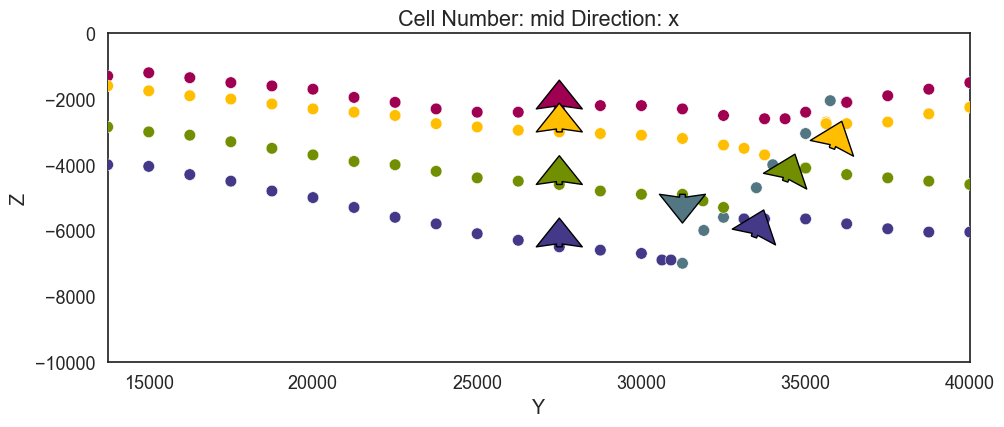

In [6]:
# Plot 2D of the data in X, Y and Z direction
gp.plot_2d(geo_model, direction=['x'], show_data=True, show_boundaries=True, legend=False, show=True)

#gp.plot_2d(geo_model, direction=['y'], show_data=True, show_boundaries=True, legend=False, show=True)

#gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [ ]:
# Plot in 3D
gpv = gp.plot_3d(geo_model, plotter_type='basic', image=False, show_data=True, show_surfaces=True, show_scalar=True, show_boundaries=True)

In [7]:
%%time
# Interpolating
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                       values
range               28373.62
$C_o$            19168154.76
drift equations       [3, 3]
Wall time: 16 s


In [8]:
%%time
# Computing a solution for the model
sol = gp.compute_model(geo_model, compute_mesh=True)

Wall time: 2.72 s


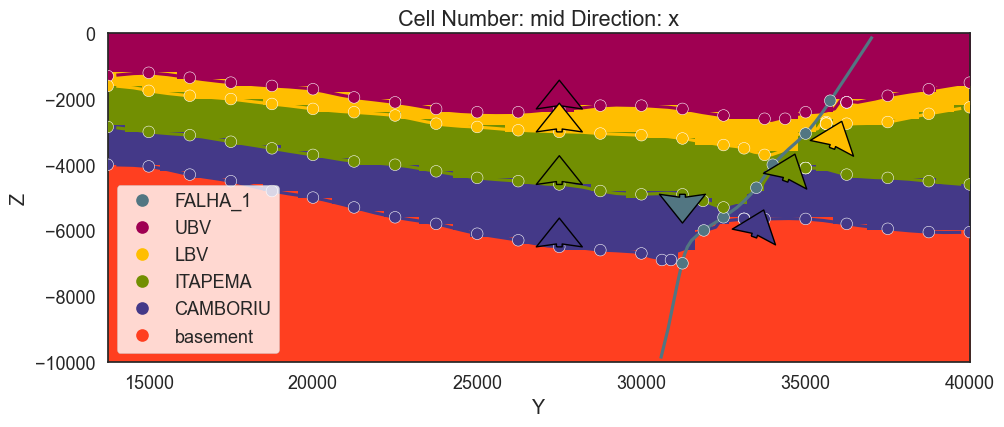

In [9]:
# Plot 2D of Y and X
#gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True)

In [11]:
# Plot 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=True, show_results=True, show_lith=False, show_boundaries=True)

In [ ]:
# Saving the model in a .zip file
'''
This code saves the model in a .zip file in 
the same folder that the .ipynb file is located
'''

gp.save_model(geo_model, compress=True)